In [1]:
from pylab import *
import networkx as nx
import random as rd
%matplotlib inline

## Task 1

In [2]:
def initialize():
    global g
    g = nx.grid_2d_graph(5, 5)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # rewiring once in every 20 steps
        nds = list(g.nodes)
        i = rd.choice(nds)
        if g.degree[i] > 0:
            g.remove_edge(i, rd.choice(list(g.neighbors(i))))
            nds.remove(i)
            for j in g.neighbors(i):
                nds.remove(j)
            g.add_edge(i, rd.choice(nds))

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

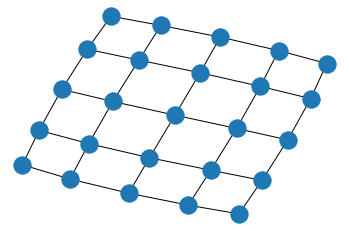

In [3]:
initialize()
observe()

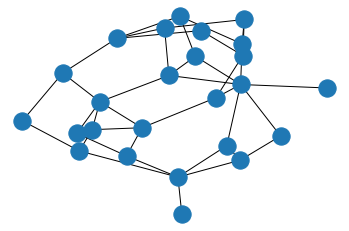

In [4]:
for i in range(1000):
    update()
observe()

## Task 2

In [5]:
m0 = 5 # number of nodes in initial condition

def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

def pref_select(nds):
    global g
    r = uniform(0, np.sum(np.fromiter([g.degree(i) for i in nds], float)))
    x=0
    for i in nds:
        x += g.degree[i]
        if r <= x:
            return i

def update(m):
    global g
    g.count += 1
    if g.count % 20 == 0: # network growth once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            nds.remove(j)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

m is 1


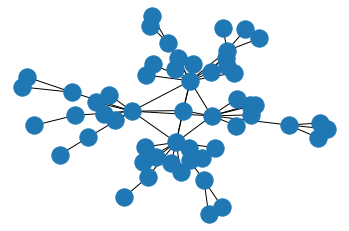

In [6]:
print(f'm is {1}')
initialize()
for i in range(1000):
    update(1)
observe()

m is 3


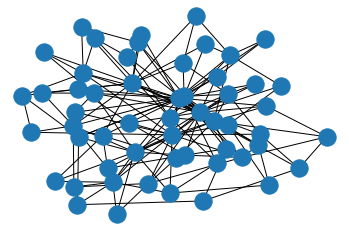

In [7]:
print(f'm is {3}')
initialize()
for i in range(1000):
    update(3)
observe()

m is 5


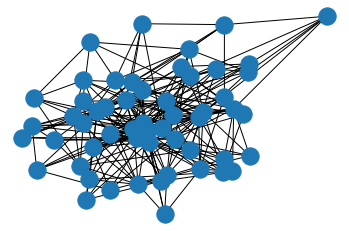

In [8]:
print(f'm is {5}')
initialize()
for i in range(1000):
    update(5)
observe()